# Notebook to calculate Statistics

### Import the libraries###

In [83]:
import json
import sys
import pandas as pd
import collections 
import os
import numpy as np
from itertools import chain
from itertools import combinations
#sys.path.append('/home/jkuettel/NLP_spark/src')
#sys.path.append('/home/jkuettel/NLP_spark')
sys.path.append('/Users/l.kaack/Documents/Policy_coding/NLP_Spark/')
from src.experiment_utils.helper_classes import token, span, repository
from src.d02_corpus_statistics.corpus import Corpus
from definitions import ROOT_DIR
from pyannote.core import Segment

## Small Tutorial



### Classes and Dataframe

All the information is now stored in a dataframe called "stat_df" containing the string of the directory path, the raw text, and all the annotations (in form of list of spans) starting with the Curation:

In [128]:
    
dataframe_dir = os.path.join(ROOT_DIR,'data/02_processed_to_dataframe', 'preprocessed_dataframe.pkl')
stat_df = pd.read_pickle(dataframe_dir)
stat_df.head()

,Policy,Text,Tokens,Article_State,Finished_Annotators,Curation,Alisha,Fride,Onerva,Fabian,Sebastian,Lynn,Joel
EU_32018R1999_Title_0_Chapter_3_Section_0_Article_15,,article 15\r\nlong-term strategies\r\n1. by ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fride]",[annotator:Curation layer:Instrumenttypes type...,[annotator:Alisha layer:Instrumenttypes type:I...,[annotator:Fride layer:Instrumenttypes type:In...,,,,,
EU_32009L0028_Title_0_Chapter_0_Section_0_Article_19,,article 19\r\ncalculation of the greenhouse ga...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[annotator:Curation layer:Instrumenttypes type...,[annotator:Alisha layer:Instrumenttypes type:I...,,[],[annotator:Fabian layer:Instrumenttypes type:I...,,,
EU_32009L0028_Title_0_Chapter_0_Section_0_Article_25,,article 25\r\ncommittees\r\n1. except in the...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[annotator:Curation layer:Policydesigncharacte...,[annotator:Alisha layer:Policydesigncharacteri...,,[],[annotator:Fabian layer:Policydesigncharacteri...,,,
EU_32019L0944_Title_0_Chapter_2_Section_0_Article_09,,article 9\r\npublic service obligations\r\n1. ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[annotator:Curation layer:Instrumenttypes type...,[annotator:Alisha layer:Instrumenttypes type:I...,,[],[annotator:Fabian layer:Instrumenttypes type:I...,,,
EU_32019L0944_Title_0_Chapter_2_Section_0_Article_08,,article 8\r\nauthorisation procedure for new c...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[annotator:Curation layer:Instrumenttypes type...,[annotator:Alisha layer:Instrumenttypes type:I...,,[],[annotator:Fabian layer:Instrumenttypes type:I...,,,


The spans of each paragraph are stored in list:

In [85]:
stat_df['Curation'][2]

[annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:12 stop:22 text:committees,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_default start:81 stop:91 text:commission,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:117 stop:154 text:committee on renewable energy sources,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_default start:237 stop:247 text:commission,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:273 stop:331 text:committee on the sustainability of biofuels and bioliquids,
 annotator:Curation layer:Policydesigncharacteristics type:Reference tag:Ref_OtherPolicy start:402 stop:422 text:decision 1999/468/ec,
 annotator:Curation layer:Policydesigncharacteristics type:Reference tag:Ref_OtherPolicy start:577 stop:597 text:decision 1999/468/ec,
 annotator:Curation layer:Technologyandappli

Each span has a layer, type, tag, start, stop, and the annotatet text (raw)

In [86]:
stat_df['Curation'][2][2]

annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:117 stop:154 text:committee on renewable energy sources

Each tag further has a repository, list of all the tokens and an annotator

In [87]:
stat_df['Curation'][2][2].rep

policy:EU_32009L0028 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_25 sentence:None

In [88]:
stat_df['Curation'][2][2].tokens

[start:117 stop:126 text:committee tag_count:3,
 start:127 stop:129 text:on tag_count:3,
 start:130 stop:139 text:renewable tag_count:5,
 start:140 stop:146 text:energy tag_count:5,
 start:147 stop:154 text:sources tag_count:5]

In [89]:
stat_df['Curation'][2][2].annotator

'Curation'

It is important to note that the token objects reside in the separate column tokens, the list of tokens for each tag is just a pointer to those objects residing in the token column.

Each Token has a start, stop, text and a tag_count. The tag_count counts how many times this specific tokens has been labeled.

In [90]:
stat_df['Tokens'][2][49]

start:257 stop:265 text:assisted tag_count:0

Repository's can be created trought the normal constructor **init**(self, policy, title, chapter, section, article) , or trough the classmethod **from_repository_name**(cls, rep_str), taking only a big string of the repository name. 

### Conditional Repository

The repository class can be used to create conditional repositorys, which are usefull to search in all the paragraphs matching a certain condition. Let's go on and create a test repository:

In [91]:
test_dir = repository.from_repository_name("EU_32008R1099_Title_0_Chapter_0_Section_0_Article_03")
test_dir

policy:EU_32008R1099 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_03 sentence:None

Let's now create a conditional repository. On each hirarchy, I can either match a certain name or I can match all the names by inserting 'None'. Simply speaking, we match all repositorys with the attributes given other than 'None. Let's assume I want to match all the tags in 'EU_32008R1099' I would create a repository like this:

In [92]:
test_dir = repository(policy = 'EU_32008R1099', title = None, chapter = None, section = None, article = None)
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None sentence:None

or simply

In [93]:
test_dir = repository(policy = 'EU_32008R1099')
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None sentence:None

If I want to match all the tags that are stored in the first article in all the policy's, titles, chapters and sections

In [94]:
test_dir = repository( article = 'Article_01')
test_dir

policy:None title:None chapter:None section:None article:Article_01 sentence:None

### Class Evaluator and evaluation functions

All the funtions calculating statistics are contained the class "Corpus", it's only class member is the dataframe:

In [95]:
test_corpus = Corpus(stat_df)

The most important funtion is the member function get_span_list(self, conditional_rep, columns, item, value). This functions takes a conditional repository (explained before), a item which can be either 'class, 'type' or 'tag' and a value. E.g item = 'layer' and value = 'Policydesigncharacteristics' or item = 'type and value ='Compliance' and item = 'tag' and value = 'Form_monitoring'. 

The function returns a list of all the tags in all the paragraphs matching the conditional repository and matching the item and value given. E.g I want to match all the tags of type 'Policydesigncharacteristics' in the policy 'EU_32008R1099':

In [96]:
test_dir = repository('EU_32008R1099')
test_corpus.get_span_list(conditional_rep = test_dir, columns = 'annotators')


[annotator:Alisha layer:Instrumenttypes type:InstrumentType tag:FrameworkPolicy start:845 stop:869 text:mechanism for monitoring,
 annotator:Alisha layer:Instrumenttypes type:InstrumentType tag:FrameworkPolicy start:1916 stop:1925 text:framework,
 annotator:Alisha layer:Instrumenttypes type:InstrumentType tag:FrameworkPolicy start:4237 stop:4246 text:framework,
 annotator:Alisha layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:19 stop:28 text:community,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:182 stop:192 text:monitoring,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:257 stop:274 text:energy statistics,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:420 stop:430 text:monitoring,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:583 stop:592 text:assessing,
 annotator:Alish

If I don't want to specify the item and the value, so match all the tags that match the conditional repository, I can put 'None':

In [97]:
test_corpus.get_span_list(conditional_rep = test_dir, item = 'layer', value = 'Policydesigncharacteristics')

[annotator:Alisha layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:19 stop:28 text:community,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:182 stop:192 text:monitoring,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:257 stop:274 text:energy statistics,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:420 stop:430 text:monitoring,
 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:583 stop:592 text:assessing,
 annotator:Alisha layer:Policydesigncharacteristics type:Reference tag:Ref_OtherPolicy start:742 stop:765 text:decision no 280/2004/ec,
 annotator:Alisha layer:Policydesigncharacteristics type:end tag: start:859 stop:869 text:monitoring,
 annotator:Alisha layer:Policydesigncharacteristics type:end tag: start:870 stop:879 text:community,
 annotator:Alisha layer:Policydesignchara

All the other member functions are based on the Corpus.get_tag_list member function, they also take the same inputs. 

get_span_distro(self, conditional_rep, item, value, return_format) returns the distribution of spans of a tag_list either in dict{span:count} or list format. The lenght of the span can be calculated on character or token level:

In [98]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'character')

{10: 33,
 19: 19,
 20: 16,
 17: 14,
 8: 14,
 13: 14,
 9: 14,
 6: 12,
 21: 12,
 11: 11,
 18: 8,
 4: 8,
 7: 7,
 15: 7,
 35: 6,
 27: 6,
 12: 6,
 16: 4,
 25: 4,
 5: 4,
 31: 3,
 22: 3,
 29: 2,
 42: 2,
 23: 2,
 14: 2,
 24: 2,
 28: 2,
 45: 2,
 36: 2,
 3: 1,
 81: 1,
 59: 1,
 58: 1,
 34: 1,
 99: 1,
 72: 1,
 76: 1,
 30: 1,
 108: 1,
 33: 1,
 86: 1}

In [99]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list')

[0,
 0,
 1,
 8,
 4,
 12,
 7,
 14,
 14,
 33,
 11,
 6,
 14,
 2,
 7,
 4,
 14,
 8,
 19,
 16,
 12,
 3,
 2,
 2,
 4,
 0,
 6,
 2,
 2,
 1,
 3,
 0,
 1,
 1,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [100]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'token')

{1: 104,
 2: 87,
 4: 18,
 3: 16,
 5: 7,
 6: 6,
 9: 4,
 7: 3,
 11: 2,
 10: 1,
 8: 1,
 13: 1,
 14: 1,
 12: 1,
 15: 1}

This span ditro can also be plottet:

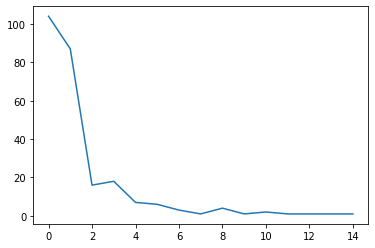

In [101]:
import matplotlib.pyplot as plt
plt.plot(test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list', level = 'token'))
plt.show()

get_span_count(self, article, item, value) returns # of tags in the tag_list. Can be used to retrieve the amount of tags matching a certain condition. E.g all the tags of class 'Policydesigncharacteristics' in the policy 'EU_32008R1099':

In [102]:
test_corpus.get_span_count(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

210

get_tokens_from_span_list(self, conditional_rep, item, value) returns a list of all the tokens in a taglist

In [103]:
test_corpus.get_tokens_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

[start:47 stop:55 text:european tag_count:4,
 start:56 stop:66 text:parliament tag_count:4,
 start:78 stop:85 text:council tag_count:4,
 start:112 stop:118 text:energy tag_count:3,
 start:119 stop:129 text:statistics tag_count:2,
 start:142 stop:145 text:eea tag_count:2,
 start:162 stop:170 text:european tag_count:4,
 start:171 stop:181 text:parliament tag_count:4,
 start:190 stop:197 text:council tag_count:5,
 start:198 stop:200 text:of tag_count:3,
 start:201 stop:204 text:the tag_count:3,
 start:205 stop:213 text:european tag_count:3,
 start:214 stop:219 text:union tag_count:3,
 start:190 stop:197 text:council tag_count:5,
 start:243 stop:249 text:treaty tag_count:4,
 start:250 stop:262 text:establishing tag_count:2,
 start:263 stop:266 text:the tag_count:2,
 start:267 stop:275 text:european tag_count:2,
 start:276 stop:285 text:community tag_count:2,
 start:243 stop:249 text:treaty tag_count:4,
 start:369 stop:379 text:commission tag_count:3,
 start:454 stop:460 text:treaty tag_cou

get_token_count_from_span_list returns the amount of tokens in the tag_list:

In [104]:
test_corpus.get_token_count_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

536

most_frequent_labeled_tokens(self, conditional_rep, item, value) returns a dict of all the most frequent tokens of a span_list

In [105]:
test_corpus.most_frequent_labeled_tokens(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'statistics': 57,
 'energy': 30,
 'commission': 24,
 'eurostat': 19,
 'the': 16,
 '/': 15,
 'national': 14,
 'of': 13,
 'and': 13,
 '(': 12,
 ')': 12,
 'member': 12,
 'community': 11,
 'states': 11,
 'ec': 9,
 'data': 8,
 'final': 7,
 'consumption': 7,
 'renewable': 6,
 'annual': 6,
 'nuclear': 6,
 'decision': 6,
 'european': 5,
 'council': 4,
 'reported': 4,
 'following': 4,
 'statistical': 4,
 'monthly': 4,
 'no': 4,
 '\xa0': 4,
 'regulation': 4,
 ',': 4,
 'parliament': 3,
 'treaty': 3,
 'studies': 3,
 'year': 3,
 '1999': 3,
 '468': 3,
 'months': 3,
 'for': 3,
 'monitoring': 3,
 'gas': 3,
 'producers': 3,
 'traders': 3,
 'distributors': 3,
 'transporters': 3,
 'importers': 3,
 'exporters': 3,
 '322': 3,
 '97': 3,
 'quality': 2,
 'pilot': 2,
 'cost-benefit': 2,
 'analyses': 2,
 'from': 2,
 '2009': 2,
 'period': 2,
 'time': 2,
 'committee': 2,
 'reporting': 2,
 'short-term': 2,
 '20th': 2,
 'day': 2,
 'its': 2,
 'publication': 2,
 'in': 2,
 '2005': 2,
 '166': 2,
 'mechanism': 2,
 'kyo

get_label_count_per_token_distro(self, conditional_rep, return_format) returns a distribution of the tag_count for all the tokens in a conditional repository. This can be used to evaluate how many tokens have been labeled once, twice and so on. The distribution is returned in either list or dict.

In [106]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'dict')

{0: 2484, 1: 385, 2: 138, 3: 100, 4: 161, 5: 75, 6: 21, 7: 12, 8: 5, 9: 1}

In [107]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list')

[2484, 385, 138, 100, 161, 75, 21, 12, 5, 1]

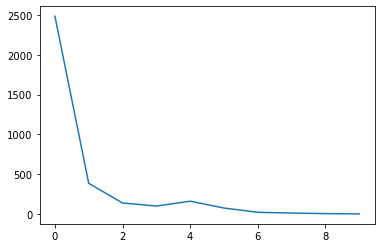

In [108]:
plt.plot(test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list'))
plt.show()

## A few important examples

Calculating all the # of paragraphs

In [109]:
len(stat_df)

448

total number of tags in a specific column

In [110]:
total_corpus_dir = repository()
test_corpus.get_span_count(total_corpus_dir, columns = 'Curation')

20857

To test that this is true,this should be equal to the # of tags in the dataframe.
First drop the error columns 

In [111]:
stat_df = stat_df.drop(stat_df[stat_df.Curation == 'error'].index)

In [112]:
len(list(chain.from_iterable(stat_df['Curation'])))

20857

Annotated tokens to total tokens

In [113]:
#Total:
test_corpus.get_token_count_from_repository(total_corpus_dir)

263752

In [114]:
#annotated: (summing over all the tokens having a minimum one label)
sum(test_corpus.get_label_count_per_token_distro(total_corpus_dir, 'list')[1:])

62825

# Statistics

We are only interested in the curation and therfore subset the dataframe to exclude the annotation by the annotators.

In [129]:
stat_cur_df = stat_df.iloc[:,:6]
stat_corpus = Corpus(stat_cur_df)

## Basic statistics

Full corpus representing the curated dataset:

In [130]:
total_corpus_dir = repository(policy = None, title = None, chapter = None, section = None, article = None)
total_corpus_dir

policy:None title:None chapter:None section:None article:None sentence:None

### Number of articles

In [131]:
len(stat_cur_df)

448

The number of annotated articles:

In [132]:
# Assign the number of spans in each article to a new column
stat_df['Curationlength'] = stat_df.apply(lambda x: len(x['Curation']), axis=1)
# Count those where no annotations were made
sum(stat_df['Curationlength']!=0)

430

### Number of tokens in the full curated dataset (annotated + not annotated):

Q: How are these three different? 1 and 3 seem like the annotated ones but are different, 2 seems the full corpus

In [133]:
stat_corpus.get_token_count_from_span_list(conditional_rep = total_corpus_dir)

61914

In [134]:
stat_corpus.get_token_count_from_repository(total_corpus_dir)

263752

In [135]:
#annotated: (summing over all the tokens having a minimum one label)
sum(stat_corpus.get_label_count_per_token_distro(total_corpus_dir, 'list')[1:])

62825

In [136]:
stat_corpus.get_label_count_per_token_distro(total_corpus_dir, 'list')[1:]

[12365, 14886, 25417, 5835, 2922, 918, 358, 94, 30]

### Number of annotated spans:

In [137]:
stat_corpus.get_span_count(total_corpus_dir)

20857

## Summary of annotations

### Span length
Distribution of the length of the spans in the curated set.

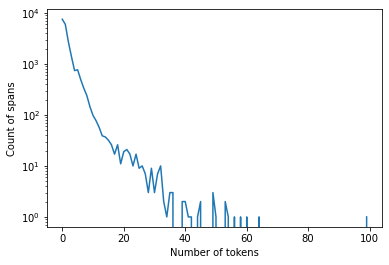

In [154]:
span_len_tokens = stat_corpus.get_span_distro(conditional_rep = total_corpus_dir, return_format = 'list', level = 'token')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(span_len_tokens)
ax.set_xlabel('Number of tokens')
ax.set_ylabel('Count of spans')
ax.set_yscale('log')
plt.savefig('span_distribution_tokens.png', dpi=200)
plt.show()

Fraction of spans with 3 or less tokens:

In [139]:
sum(span_len_tokens[:3])/sum(span_len_tokens) 

0.8181818181818182

#### Looking at those long spans

In [155]:
spanlist = stat_corpus.get_span_list(conditional_rep = total_corpus_dir)

In [156]:
# Making a dataframe that can be sorted by the number of characters in the info string
entrylen = [len(str(x)) for x in spanlist]
spanlen = pd.DataFrame(data = {"entrylen": entrylen, "spanlist": spanlist})
spanlen = spanlen.sort_values(by = "entrylen", ascending=False)
print(str(spanlen.iloc[0,1]))

annotator:Curation layer:Policydesigncharacteristics type:Reversibility tag:Reversibility_policy start:1630 stop:2099 text:a delegated act adopted pursuant to article 3(5), article 15(5), article 26(6), article 37(7) and article 40(4) shall enter into force only if no objection has been expressed either by the european parliament or the council within a period of two months of notification of that act to the european parliament and to the council or if, before the expiry of that period, the european parliament and the council have both informed the commission that they will not object.



In [157]:
stat_corpus.get_span_distro(conditional_rep = total_corpus_dir, return_format = 'dict', level = 'character')

{13: 1652,
 10: 1565,
 12: 1143,
 8: 1070,
 7: 902,
 6: 870,
 9: 865,
 11: 861,
 20: 805,
 19: 715,
 16: 617,
 17: 603,
 14: 570,
 29: 559,
 15: 546,
 18: 462,
 24: 448,
 4: 444,
 21: 421,
 28: 420,
 25: 359,
 22: 315,
 5: 291,
 26: 285,
 23: 285,
 27: 283,
 33: 193,
 30: 187,
 31: 166,
 34: 140,
 38: 137,
 35: 135,
 32: 131,
 44: 110,
 36: 109,
 43: 109,
 3: 104,
 37: 94,
 40: 84,
 39: 83,
 41: 81,
 45: 78,
 42: 76,
 50: 76,
 47: 69,
 48: 60,
 46: 54,
 49: 54,
 54: 51,
 53: 42,
 58: 39,
 52: 37,
 51: 36,
 55: 36,
 67: 35,
 59: 33,
 60: 30,
 56: 29,
 63: 26,
 57: 26,
 68: 24,
 62: 23,
 64: 22,
 66: 22,
 61: 20,
 70: 18,
 72: 17,
 71: 16,
 65: 16,
 73: 16,
 80: 15,
 69: 15,
 83: 14,
 75: 14,
 77: 14,
 74: 14,
 82: 13,
 79: 13,
 86: 12,
 87: 12,
 88: 12,
 78: 11,
 93: 10,
 76: 10,
 95: 10,
 99: 9,
 89: 9,
 90: 9,
 85: 9,
 81: 8,
 91: 8,
 96: 8,
 92: 8,
 102: 7,
 121: 6,
 97: 6,
 98: 6,
 113: 6,
 94: 6,
 129: 6,
 128: 6,
 141: 6,
 118: 6,
 84: 6,
 127: 5,
 115: 5,
 107: 5,
 114: 5,
 163: 

It seems like the largest span matches the one we found above in terms of \# of characters (469) but not in the number of tokens. This is supposed to be 104 but if we paste it into a word-counter we get around 70.

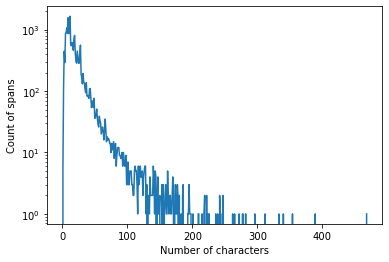

In [158]:
fig, ax = plt.subplots()
ax.plot(stat_corpus.get_span_distro(conditional_rep = total_corpus_dir, return_format = 'list', level = 'character'))
ax.set_xlabel('Number of characters')
ax.set_ylabel('Count of spans')
ax.set_yscale('log')
plt.savefig('span_distribution_char.png', dpi=200)
plt.show()

### Counts of annotations 

#### Number of annotations per layer

In [162]:
n_instr = stat_corpus.get_span_count(item = 'layer',value = 'Instrumenttypes', conditional_rep = total_corpus_dir)

In [163]:
n_pdc = stat_corpus.get_span_count(item = 'layer',value = 'Policydesigncharacteristics', conditional_rep = total_corpus_dir)

In [164]:
n_techspec = stat_corpus.get_span_count(item = 'layer',value = 'Technologyandapplicationspecificity', conditional_rep = total_corpus_dir)

In [165]:
n_instr1 = stat_corpus.get_span_count(item = 'tag',value = 'VoluntaryAgrmt', conditional_rep = total_corpus_dir)
n_instr2 = stat_corpus.get_span_count(item = 'tag',value = 'FrameworkPolicy', conditional_rep = total_corpus_dir)
n_instr3 = stat_corpus.get_span_count(item = 'tag',value = 'TradablePermit', conditional_rep = total_corpus_dir)
n_instr4 = stat_corpus.get_span_count(item = 'tag',value = 'RegulatoryInstr', conditional_rep = total_corpus_dir)
n_instr5 = stat_corpus.get_span_count(item = 'tag',value = 'TaxIncentives', conditional_rep = total_corpus_dir)
n_instr6 = stat_corpus.get_span_count(item = 'tag',value = 'Subsidies_Incentives', conditional_rep = total_corpus_dir)
n_instr7 = stat_corpus.get_span_count(item = 'tag',value = 'RD_D', conditional_rep = total_corpus_dir)
n_instr8 = stat_corpus.get_span_count(item = 'tag',value = 'PublicInvt', conditional_rep = total_corpus_dir)
n_instr9 = stat_corpus.get_span_count(item = 'tag',value = 'Edu_Outreach', conditional_rep = total_corpus_dir)
n_instr10 = stat_corpus.get_span_count(item = 'tag',value = 'Unspecified', conditional_rep = total_corpus_dir)

In [166]:
n_pdc1 = stat_corpus.get_span_count(item = 'type',value = 'Actor', conditional_rep = total_corpus_dir)
n_pdc2 = stat_corpus.get_span_count(item = 'type',value = 'Compliance', conditional_rep = total_corpus_dir)
n_pdc3 = stat_corpus.get_span_count(item = 'type',value = 'Reference', conditional_rep = total_corpus_dir)
n_pdc4 = stat_corpus.get_span_count(item = 'type',value = 'Objective', conditional_rep = total_corpus_dir)
n_pdc5 = stat_corpus.get_span_count(item = 'type',value = 'Resource', conditional_rep = total_corpus_dir)
n_pdc6 = stat_corpus.get_span_count(item = 'type',value = 'Reversibility', conditional_rep = total_corpus_dir)
n_pdc7 = stat_corpus.get_span_count(item = 'type',value = 'Time', conditional_rep = total_corpus_dir)

In [234]:
n_pdc11 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_default', conditional_rep = total_corpus_dir)
n_pdc12 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_legislative', conditional_rep = total_corpus_dir)
n_pdc13 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_established', conditional_rep = total_corpus_dir)
n_pdc14 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_monitoring', conditional_rep = total_corpus_dir)
n_pdc15 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_default', conditional_rep = total_corpus_dir)
n_pdc16 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_resource', conditional_rep = total_corpus_dir)
n_pdc17 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_monitored', conditional_rep = total_corpus_dir)
n_pdc18 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_sector', conditional_rep = total_corpus_dir)
##
n_pdc21 = stat_corpus.get_span_count(item = 'tag',value = 'Form_sanctioning', conditional_rep = total_corpus_dir)
n_pdc22 = stat_corpus.get_span_count(item = 'tag',value = 'Form_monitoring', conditional_rep = total_corpus_dir)
##
n_pdc31 = stat_corpus.get_span_count(item = 'tag',value = 'Ref_OtherPolicy', conditional_rep = total_corpus_dir)
n_pdc32 = stat_corpus.get_span_count(item = 'tag',value = 'Ref_PolicyAmended', conditional_rep = total_corpus_dir)
n_pdc33 = stat_corpus.get_span_count(item = 'tag',value = 'Ref_Strategy_Agreement', conditional_rep = total_corpus_dir)
##
n_pdc41 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QuantTarget', conditional_rep = total_corpus_dir)
n_pdc42 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QualIntention', conditional_rep = total_corpus_dir)
n_pdc43 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QuantTarget_noCCM', conditional_rep = total_corpus_dir)
n_pdc44 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QualIntention_noCCM', conditional_rep = total_corpus_dir)
##
n_pdc51 = stat_corpus.get_span_count(item = 'tag',value = 'Resource_MonSpending', conditional_rep = total_corpus_dir)
n_pdc52 = stat_corpus.get_span_count(item = 'tag',value = 'Resource_MonRevenues', conditional_rep = total_corpus_dir)
n_pdc53 = stat_corpus.get_span_count(item = 'tag',value = 'Resource_other', conditional_rep = total_corpus_dir)
##
n_pdc61 = stat_corpus.get_span_count(item = 'tag',value = '', conditional_rep = total_corpus_dir)
##
n_pdc71 = stat_corpus.get_span_count(item = 'tag',value = 'Time_PolDuration', conditional_rep = total_corpus_dir)
n_pdc72 = stat_corpus.get_span_count(item = 'tag',value = 'Time_Monitoring', conditional_rep = total_corpus_dir)
n_pdc73 = stat_corpus.get_span_count(item = 'tag',value = 'Time_Resources', conditional_rep = total_corpus_dir)
n_pdc74 = stat_corpus.get_span_count(item = 'tag',value = 'Time_Compliance', conditional_rep = total_corpus_dir)
n_pdc75 = stat_corpus.get_span_count(item = 'tag',value = 'Time_InEffect', conditional_rep = total_corpus_dir)

In [167]:
n_techspec1 = stat_corpus.get_span_count(item = 'type',value = 'TechnologySpecificity', conditional_rep = total_corpus_dir)
n_techspec2 = stat_corpus.get_span_count(item = 'type',value = 'EnergySpecificity', conditional_rep = total_corpus_dir)
n_techspec3 = stat_corpus.get_span_count(item = 'type',value = 'ApplicationSpecificity', conditional_rep = total_corpus_dir)

In [222]:
n_techspec11 = stat_corpus.get_span_count(item = 'tag',value = 'Tech_LowCarbon', conditional_rep = total_corpus_dir)
n_techspec12 = stat_corpus.get_span_count(item = 'tag',value = 'Tech_Other', conditional_rep = total_corpus_dir)
##
n_techspec21 = stat_corpus.get_span_count(item = 'tag',value = 'Energy_LowCarbon', conditional_rep = total_corpus_dir)
n_techspec22 = stat_corpus.get_span_count(item = 'tag',value = 'Energy_Other', conditional_rep = total_corpus_dir)
##
n_techspec31 = stat_corpus.get_span_count(item = 'tag',value = 'App_LowCarbon', conditional_rep = total_corpus_dir)
n_techspec32 = stat_corpus.get_span_count(item = 'tag',value = 'App_Other', conditional_rep = total_corpus_dir)

In [217]:
# Data frame for the hierarchical visualization
n = n_instr+n_pdc+n_techspec
coding_scheme = ["Instrument types", "Policy design characteristics", "Technology and application specificity", 
                 'Voluntary agreement', "Framework policy", "Tradable permit", "Regulatory instrument", "Tax incentives",
                 "Subsidies and direct incentives", "RD&D", "Public Investment", "Education and outreach", "Unspecified",
                "Actor", "Compliance", 'Links to other policies', 'Objective', 'Resource', 'Reversibility', 'Time',
                'Technology specificity','Energy specificity', 'Application specificity']
df = pd.DataFrame(data = {"Item and Group": coding_scheme, 
                          "Weight": [n_instr/n, n_pdc/n, n_techspec/n,
                                     n_instr1, n_instr2, n_instr3, n_instr4, 
                                     n_instr5, n_instr6, n_instr7, n_instr8, n_instr9, n_instr10,
                                     n_pdc1, n_pdc2, n_pdc3, n_pdc4, n_pdc5, n_pdc6, n_pdc7,
                                    n_techspec1, n_techspec2, n_techspec3], 
                          "Parent":["", "", "",
                                    "Instrument types", "Instrument types","Instrument types","Instrument types",
                                    "Instrument types","Instrument types","Instrument types","Instrument types",
                                    "Instrument types","Instrument types",
                                    "Policy design characteristics", "Policy design characteristics",
                                    "Policy design characteristics", "Policy design characteristics", 
                                    "Policy design characteristics", "Policy design characteristics", 
                                    "Policy design characteristics",
                                   "Technology and application specificity", "Technology and application specificity", 
                                    "Technology and application specificity"]})


#### Sunburst plot of the first two levels of the hierarchy

In [218]:
import plotly.express as px 
import plotly.io as pio

fig = px.sunburst(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent')
fig.write_image('ann_distribution_sunburst_2level.pdf', engine = "orca")
fig.show()

/Users/l.kaack/miniconda3/envs/policycoding/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/l.kaack/miniconda3/envs/policycoding/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Sunburst plot of all three levels of the hierarchy

In [267]:
df_instrument = pd.DataFrame(data = {"Weight": [n_instr1, n_instr2, n_instr3, n_instr4, 
                                    n_instr5, n_instr6, n_instr7, n_instr8, 
                                   n_instr9, n_instr10],
                         "Layers": ["Instrument types"]*10,
                        "Features": ["Instrument types"]*10,
                         "Tags": ['Voluntary agreement', "Framework policy", "Tradable permit", "Regulatory instrument", "Tax incentives",
                 "Subsidies and direct incentives", "RD&D", "Public Investment", "Education and outreach", "Unspecified"]})

df_pdc = pd.DataFrame(data = {"Weight": [n_pdc11, n_pdc12, n_pdc13, n_pdc14, n_pdc15, n_pdc16, n_pdc17, n_pdc18,
                                        n_pdc21, n_pdc22,
                                        n_pdc31, n_pdc32, n_pdc33,
                                        n_pdc41, n_pdc42, n_pdc43, n_pdc44,
                                        n_pdc51, n_pdc52, n_pdc53,
                                        n_pdc61,
                                        n_pdc71, n_pdc72, n_pdc73, n_pdc74, n_pdc75],
                              "Layers": ["Policy design char."]* (8+2+3+4+3+1+5),
                               "Features": ['Actor']* 8 + ["Compliance"] * 2 + 
                                            ['Links to other policies'] *3 + 
                                            ['Objective']* 4 + 
                                          ['Resource']* 3 + ['Reversibility'] + ['Time'] *5,
                              "Tags": ['Default authority', 'Legislative authority', 'Newly established authority', 'Monitoring authority', 'Default addressee', 'Resources addressee', 'Monitored addressee', 'Sector addressee',
                                      'Sanctioning form', 'Monitoring form',
                                      'Reference to other policy', 'Amendment of policy', 'Reference to strategy or agreement',
                                      'Quantitative target', 'Qualitative intention', 'Quantitative target no mitigation', 'Qualitative intention not mitigation',
                                      'Monetary spending', 'Monetary revenues', 'Other resource type',
                                       'Provision for reversibility',
                                       'Policy duration time', 'Monitoring time', 'Resources time', 'Compliance time', 'In-effect time']})

df_tech = pd.DataFrame(data = {"Weight": [n_techspec11, n_techspec12,
                                    n_techspec21, n_techspec22,
                                    n_techspec31, n_techspec32], 
                          "Layers":["Tech. and app. specificity"]*6,
                        "Features": ['Technology specificity', 'Technology specificity', 
                                     'Energy specificity', 'Energy specificity', 
                                     'Application specificity', 'Application specificity'], 
                          "Tags": ["Low-carbon tech", "Other tech", 
                                   'Low-carbon energy', "Other energy", 
                                  "Low-carbon application", "Other application"]
                         })

df=pd.concat([df_instrument, df_pdc, df_tech])

In [268]:
fig = px.sunburst(df, path=['Layers', 'Features', 'Tags'], values='Weight', color='Layers')
fig.write_image('ann_distribution_sunburst.pdf', engine = "orca")
fig.show()

/Users/l.kaack/miniconda3/envs/policycoding/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/l.kaack/miniconda3/envs/policycoding/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/l.kaack/miniconda3/envs/policycoding/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

